In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.stats import zscore
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load datasets
feedback_df = pd.read_csv("customer_feedback_satisfaction.csv")
sales_df = pd.read_csv("sales_and_customer_insights.csv")
trends_df = pd.read_csv("shopping_trends.csv")

In [3]:
# Display first few rows of each dataset
print("Customer Feedback Satisfaction:")
display(feedback_df.head())

print("\nSales and Customer Insights:")
display(sales_df.head())

print("\nShopping Trends:")
display(trends_df.head())

Customer Feedback Satisfaction:


,CustomerID,Age,Gender,Country,Income,ProductQuality,ServiceQuality,PurchaseFrequency,FeedbackScore,LoyaltyLevel,SatisfactionScore
0,1,56,Male,UK,83094,5,8,5,Low,Bronze,100.0
1,2,69,Male,UK,86860,10,2,8,Medium,Gold,100.0
2,3,46,Female,USA,60173,8,10,18,Medium,Silver,100.0
3,4,32,Female,UK,73884,7,10,16,Low,Gold,100.0
4,5,60,Male,UK,97546,6,4,13,Low,Bronze,82.0



Sales and Customer Insights:


,Customer_ID,Product_ID,Transaction_ID,Purchase_Frequency,Average_Order_Value,Most_Frequent_Category,Time_Between_Purchases,Region,Churn_Probability,Lifetime_Value,Launch_Date,Peak_Sales_Date,Season,Preferred_Purchase_Times,Retention_Strategy
0,CUST_9HOS83,PROD_IK97D1,TRANS_II1DZG,17,172.57,Electronics,45,South America,0.98,952.81,2020-03-14,2023-09-11,Winter,Afternoon,Loyalty Program
1,CUST_AJU17N,PROD_UNN7KP,TRANS_9HJF7I,10,64.89,Clothing,6,South America,0.66,5427.51,2022-10-15,2023-01-02,Spring,Afternoon,Discount
2,CUST_11XNYF,PROD_0XEW2W,TRANS_OT96OM,3,120.38,Sports,23,Asia,0.60,3994.80,2021-11-30,2023-04-06,Winter,Evening,Loyalty Program
3,CUST_IGH8G3,PROD_3IIAJN,TRANS_45V00G,12,70.34,Clothing,5,North America,0.78,4880.01,2022-03-20,2023-03-23,Spring,Evening,Discount
4,CUST_OK6PUM,PROD_VMIWD2,TRANS_ZAK760,18,42.39,Electronics,10,North America,0.52,8557.70,2022-11-09,2023-10-28,Spring,Morning,Discount



Shopping Trends:


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [4]:
# Check missing values
print("Missing Values in Datasets:")
print(feedback_df.isnull().sum(), "\n")
print(sales_df.isnull().sum(), "\n")
print(trends_df.isnull().sum(), "\n")

Missing Values in Datasets:
CustomerID           0
Age                  0
Gender               0
Country              0
Income               0
ProductQuality       0
ServiceQuality       0
PurchaseFrequency    0
FeedbackScore        0
LoyaltyLevel         0
SatisfactionScore    0
dtype: int64 

Customer_ID                 0
Product_ID                  0
Transaction_ID              0
Purchase_Frequency          0
Average_Order_Value         0
Most_Frequent_Category      0
Time_Between_Purchases      0
Region                      0
Churn_Probability           0
Lifetime_Value              0
Launch_Date                 0
Peak_Sales_Date             0
Season                      0
Preferred_Purchase_Times    0
Retention_Strategy          0
dtype: int64 

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0

# Demographic Analysis

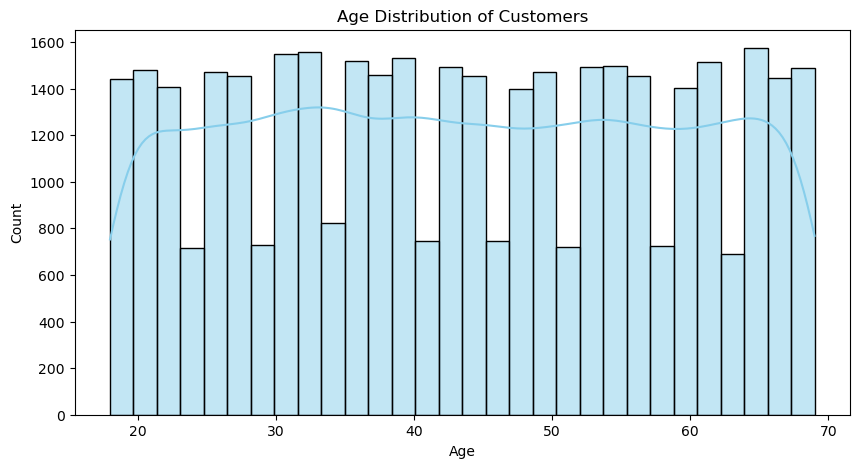

In [6]:
# Age Distribution
plt.figure(figsize=(10, 5))
sns.histplot(feedback_df["Age"], bins=30, kde=True, color="skyblue")
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

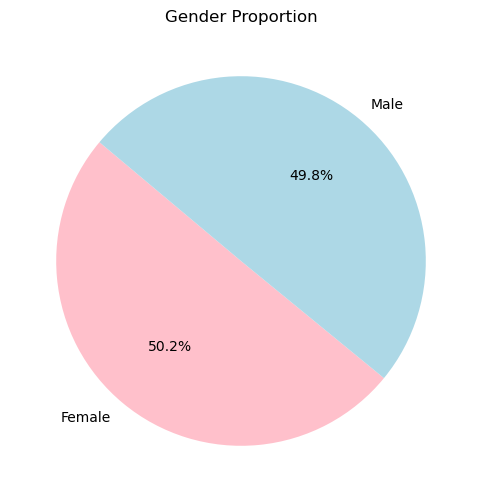

In [7]:
# Gender Proportions
gender_counts = feedback_df["Gender"].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%", colors=[ "pink", "lightblue"], startangle=140)
plt.title("Gender Proportion")
plt.show()

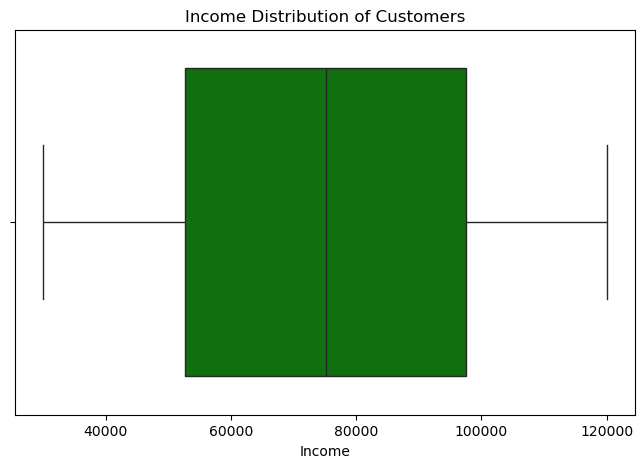

In [8]:
# Income level distribution
plt.figure(figsize=(8, 5))
sns.boxplot(x="Income", data=feedback_df, color="green")
plt.title("Income Distribution of Customers")
plt.xlabel("Income")
plt.show()

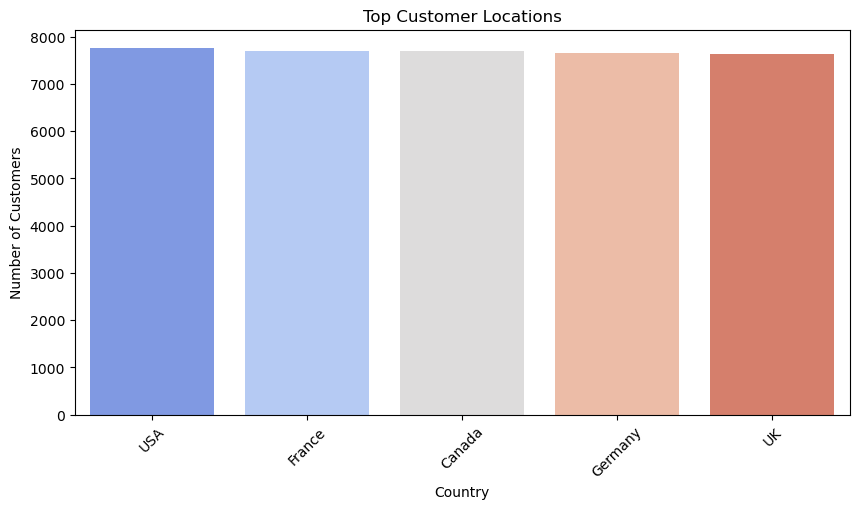

In [9]:
# Group Customers by Geographic Location (Top Countries)
top_countries = feedback_df["Country"].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_countries.index, y=top_countries.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Top Customer Locations")
plt.xlabel("Country")
plt.ylabel("Number of Customers")
plt.show()

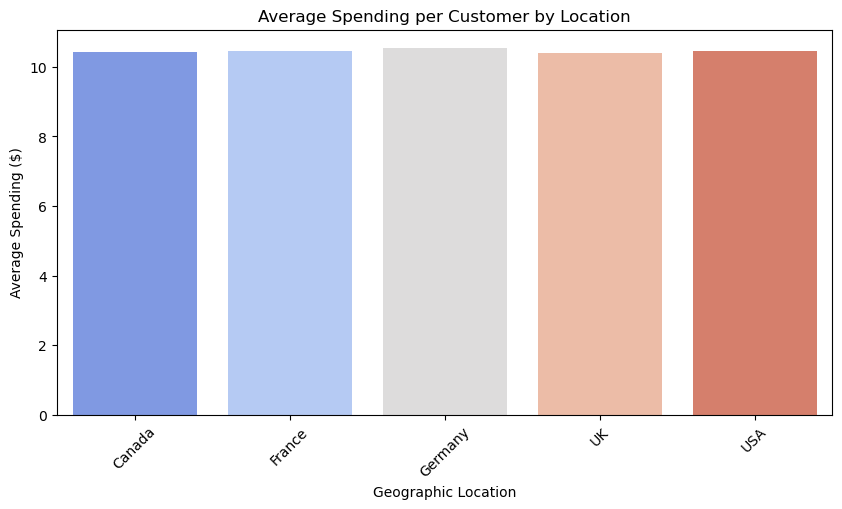

In [10]:
# Average spending per location
location_spending = feedback_df.groupby("Country")["PurchaseFrequency"].mean()

plt.figure(figsize=(10, 5))
sns.barplot(x=location_spending.index, y=location_spending.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Average Spending per Customer by Location")
plt.xlabel("Geographic Location")
plt.ylabel("Average Spending ($)")
plt.show()

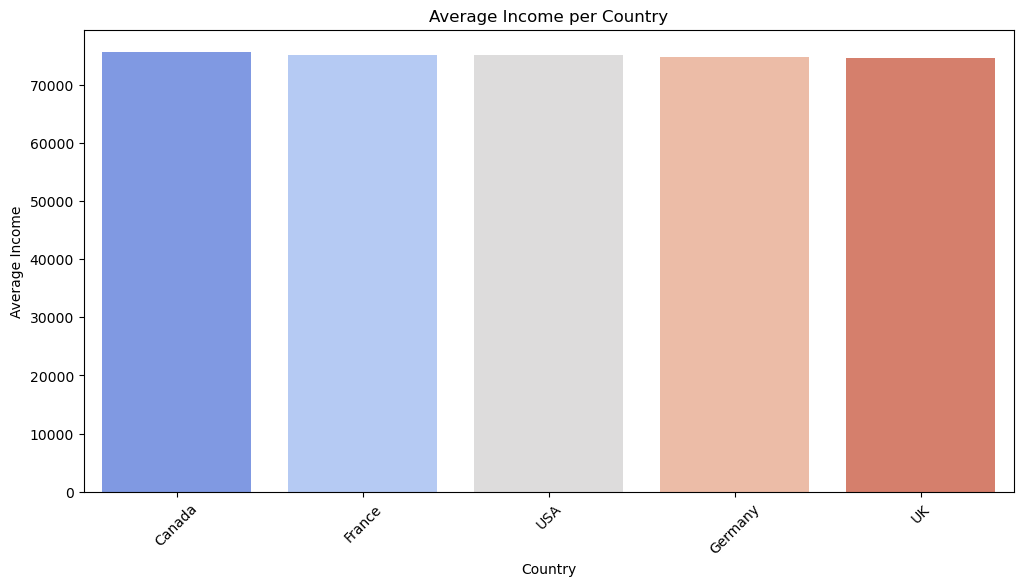

In [11]:
# Average Income by Country
avg_income = feedback_df.groupby("Country")["Income"].mean().sort_values(ascending=False)

# Bar Chart for Average Income per Country
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_income.index, y=avg_income.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Average Income per Country")
plt.xlabel("Country")
plt.ylabel("Average Income")
plt.show()

# Purchasing Patterns

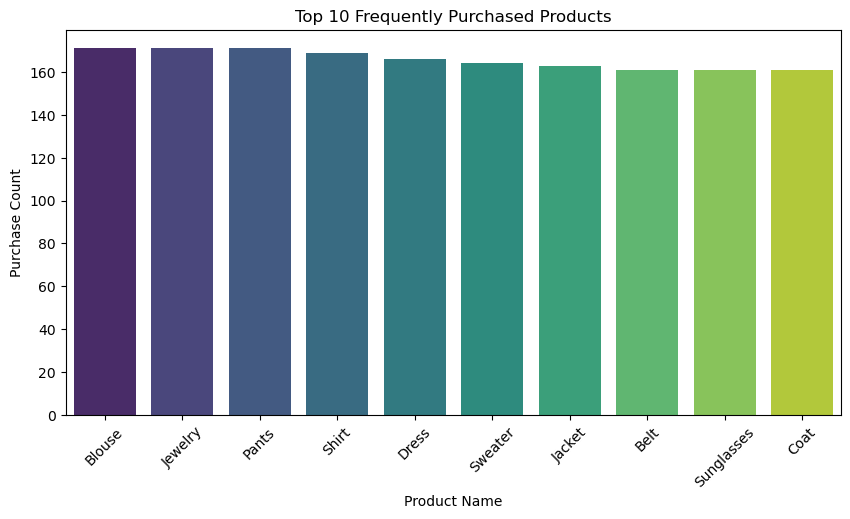

In [13]:
# Monitor Frequently Purchased Products
top_products = trends_df["Item Purchased"].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_products.index, y=top_products.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Top 10 Frequently Purchased Products")
plt.xlabel("Product Name")
plt.ylabel("Purchase Count")
plt.show()

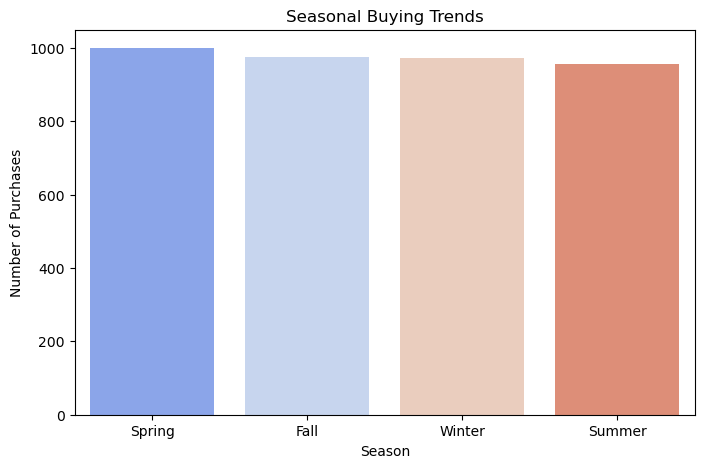

In [14]:
# Analyze Seasonal Buying Trends
seasonal_trends = trends_df["Season"].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=seasonal_trends.index, y=seasonal_trends.values, palette="coolwarm")
plt.title("Seasonal Buying Trends")
plt.xlabel("Season")
plt.ylabel("Number of Purchases")
plt.show()

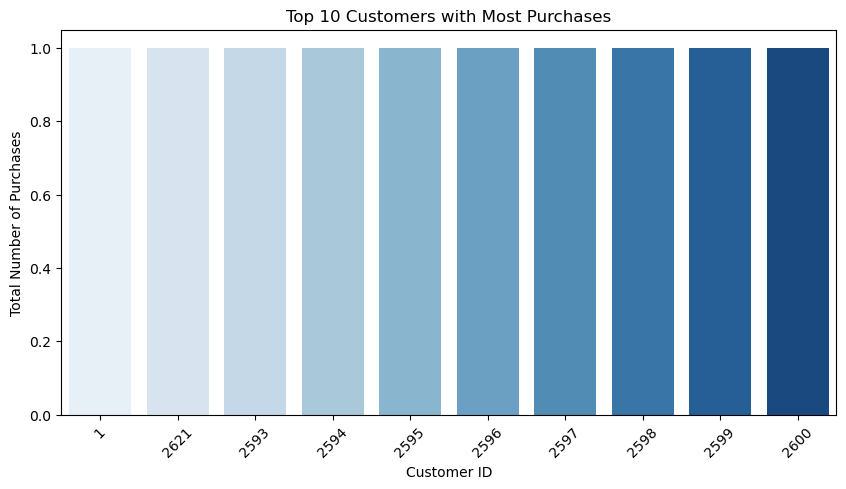

In [15]:
# Identify Recurring Orders (Customers with Most Purchases)
top_customers = trends_df["Customer ID"].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_customers.index.astype(str), y=top_customers.values, palette="Blues")
plt.xticks(rotation=45)
plt.title("Top 10 Customers with Most Purchases")
plt.xlabel("Customer ID")
plt.ylabel("Total Number of Purchases")
plt.show()

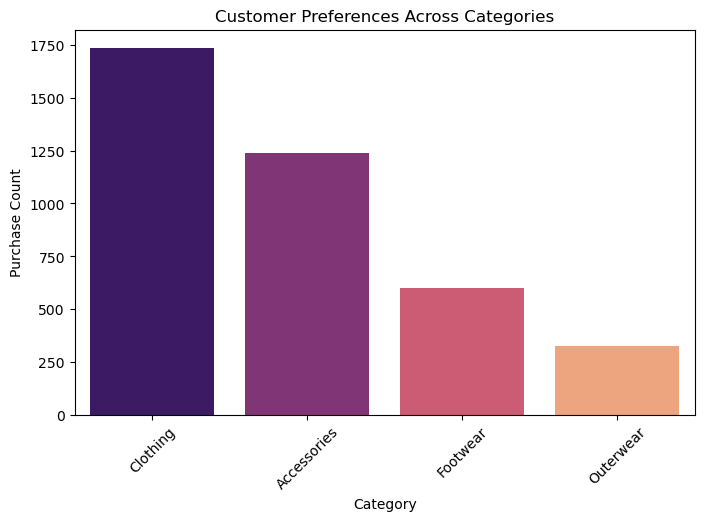

In [16]:
# Customer Preferences Across Categories
category_trends = trends_df["Category"].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=category_trends.index, y=category_trends.values, palette="magma")
plt.xticks(rotation=45)
plt.title("Customer Preferences Across Categories")
plt.xlabel("Category")
plt.ylabel("Purchase Count")
plt.show()

# Behavioral Insight

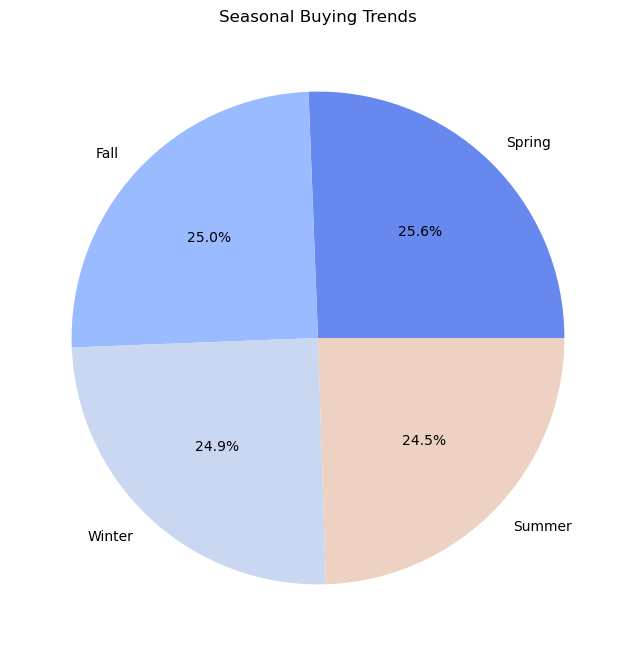

In [18]:
# Seasonal Purchase Trends
seasonal_trends = trends_df["Season"].value_counts()

# Pie Chart for Seasonal Trends
plt.figure(figsize=(8, 8))
plt.pie(seasonal_trends, labels=seasonal_trends.index, autopct="%1.1f%%", colors=sns.color_palette("coolwarm"))
plt.title("Seasonal Buying Trends")
plt.show()


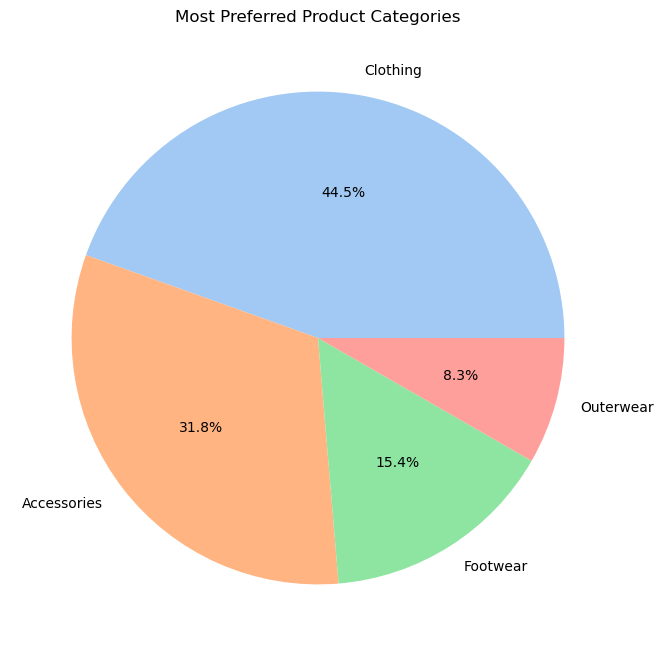

In [19]:
# Top 5 most popular categories
top_categories = trends_df["Category"].value_counts().head(5)

# Pie Chart for Category Preference
plt.figure(figsize=(8, 8))
plt.pie(top_categories, labels=top_categories.index, autopct="%1.1f%%", colors=sns.color_palette("pastel"))
plt.title("Most Preferred Product Categories")
plt.show()

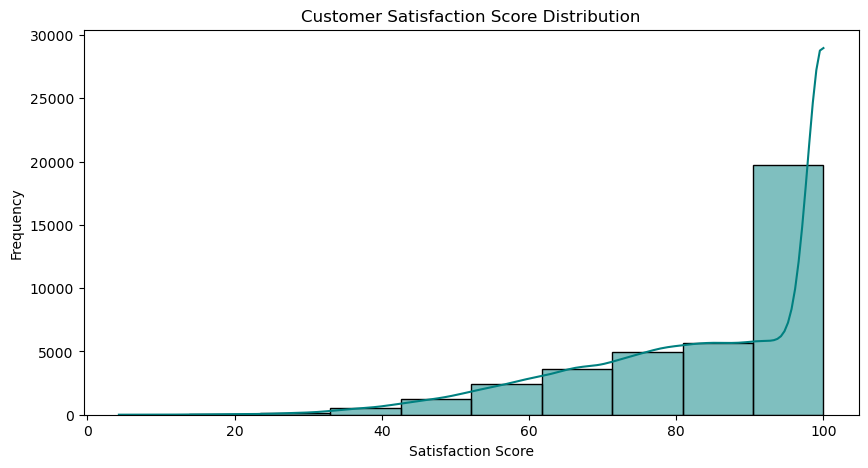

In [20]:
# Customer Satisfaction Distribution
plt.figure(figsize=(10, 5))
sns.histplot(feedback_df["SatisfactionScore"], bins=10, kde=True, color="teal")
plt.title("Customer Satisfaction Score Distribution")
plt.xlabel("Satisfaction Score")
plt.ylabel("Frequency")
plt.show()

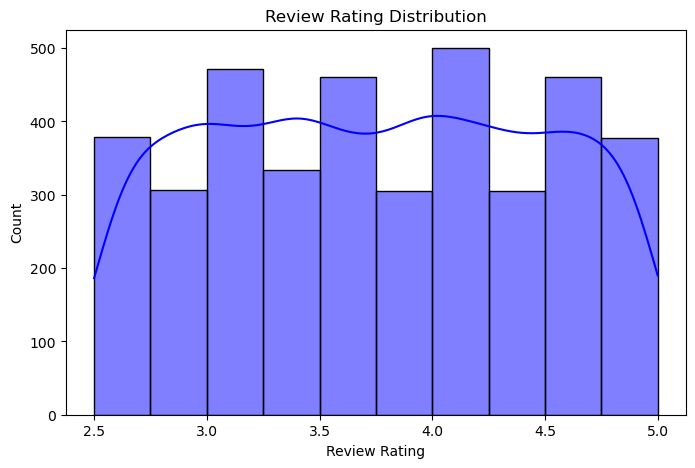

In [21]:
# Histogram for Review Rating Distribution
plt.figure(figsize=(8, 5))
sns.histplot(trends_df["Review Rating"], bins=10, kde=True, color="blue")
plt.title("Review Rating Distribution")
plt.xlabel("Review Rating")
plt.ylabel("Count")
plt.show()

# Financial Impact

In [23]:
# Calculate average spending per customer
avg_spending_per_customer = trends_df.groupby("Customer ID")["Purchase Amount (USD)"].mean()

# Calculate total spending per customer
total_spending_per_customer = trends_df.groupby("Customer ID")["Purchase Amount (USD)"].sum()

# Assuming profitability margin = (Revenue - Cost) / Revenue
profit_margin = 0.30  # Example assumption
profit_per_customer = total_spending_per_customer * profit_margin  

# Convert to DataFrame
profitability_df = pd.DataFrame({
    "Avg Spending": avg_spending_per_customer,
    "Total Spending": total_spending_per_customer,
    "Profit": profit_per_customer
})

# Display top 10 customers based on total spending
top_customers = profitability_df.sort_values(by="Total Spending", ascending=False).head(10)
print(top_customers)

             Avg Spending  Total Spending  Profit
Customer ID                                      
2843                100.0             100    30.0
96                  100.0             100    30.0
582                 100.0             100    30.0
1422                100.0             100    30.0
3838                100.0             100    30.0
862                 100.0             100    30.0
2215                100.0             100    30.0
1592                100.0             100    30.0
1457                100.0             100    30.0
244                 100.0             100    30.0


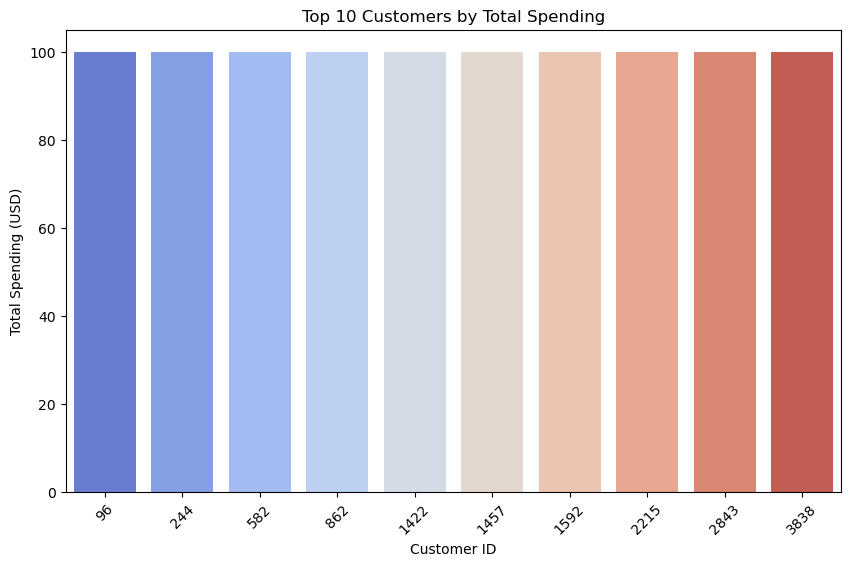

In [24]:
# Top 10 Customers by Total Spending
plt.figure(figsize=(10, 6))
sns.barplot(x=top_customers.index, y=top_customers["Total Spending"], palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Top 10 Customers by Total Spending")
plt.xlabel("Customer ID")
plt.ylabel("Total Spending (USD)")
plt.show()

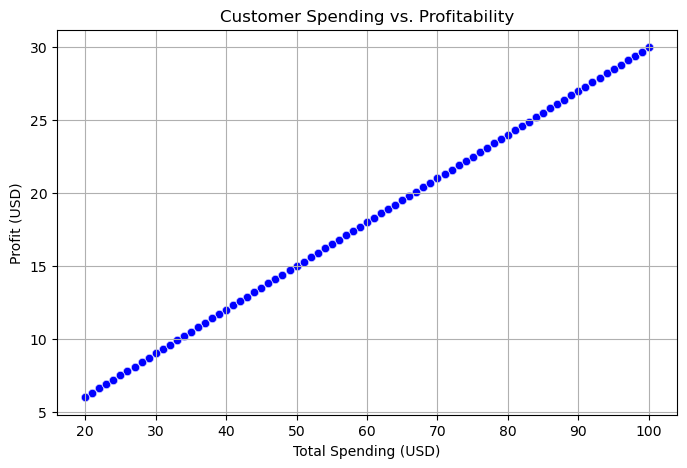

In [25]:
# Scatter Plot: Spending vs. Profit per Customer
plt.figure(figsize=(8, 5))
sns.scatterplot(x=profitability_df["Total Spending"], y=profitability_df["Profit"], alpha=0.7, color="blue")
plt.title("Customer Spending vs. Profitability")
plt.xlabel("Total Spending (USD)")
plt.ylabel("Profit (USD)")
plt.grid(True)
plt.show()

In [26]:
# Define segmentation criteria
def segment_customer(row):
    if row["Churn_Probability"] > 0.7:
        return "High Risk"
    elif row["Churn_Probability"] > 0.4:
        return "Medium Risk"
    else:
        return "Low Risk"

# Apply segmentation
sales_df["Credit Risk Segment"] = sales_df.apply(segment_customer, axis=1)

# Payment habits: Frequent vs. infrequent purchasers
sales_df["Payment Habit"] = sales_df["Purchase_Frequency"].apply(lambda x: "Frequent" if x > 10 else "Infrequent")

# Financial stability: Based on Lifetime Value (LTV)
median_ltv = sales_df["Lifetime_Value"].median()
sales_df["Financial Stability"] = sales_df["Lifetime_Value"].apply(lambda x: "Stable" if x >= median_ltv else "Unstable")

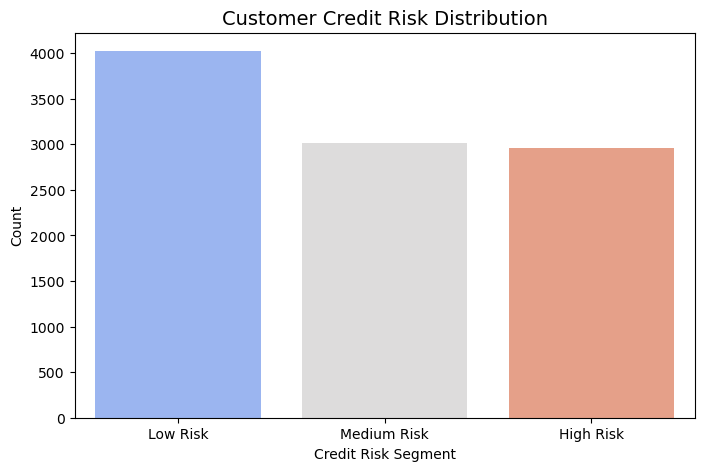

In [27]:
# Plot: Credit Risk Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x="Credit Risk Segment", data=sales_df, palette="coolwarm", order=["Low Risk", "Medium Risk", "High Risk"])
plt.title("Customer Credit Risk Distribution", fontsize=14)
plt.xlabel("Credit Risk Segment")
plt.ylabel("Count")
plt.show()

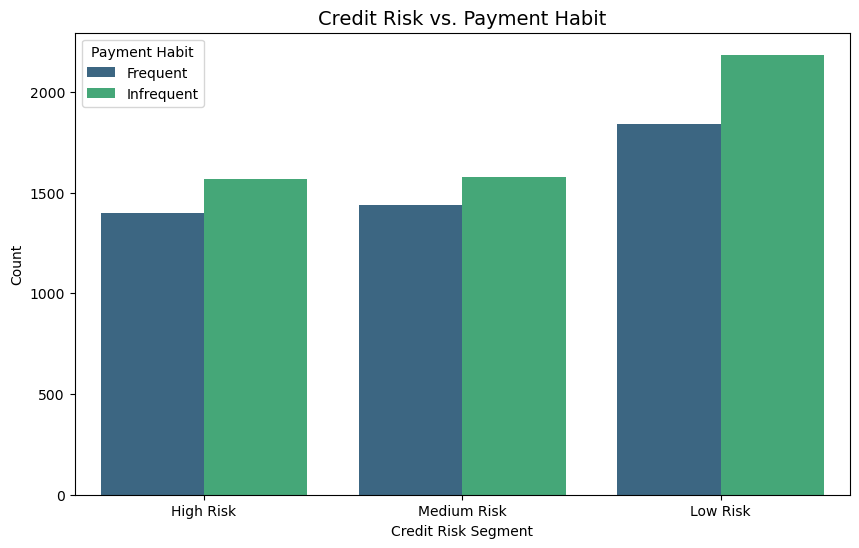

In [28]:
# Plot: Payment Habit vs. Credit Risk
plt.figure(figsize=(10, 6))
sns.countplot(x="Credit Risk Segment", hue="Payment Habit", data=sales_df, palette="viridis")
plt.title("Credit Risk vs. Payment Habit", fontsize=14)
plt.xlabel("Credit Risk Segment")
plt.ylabel("Count")
plt.legend(title="Payment Habit")
plt.show()

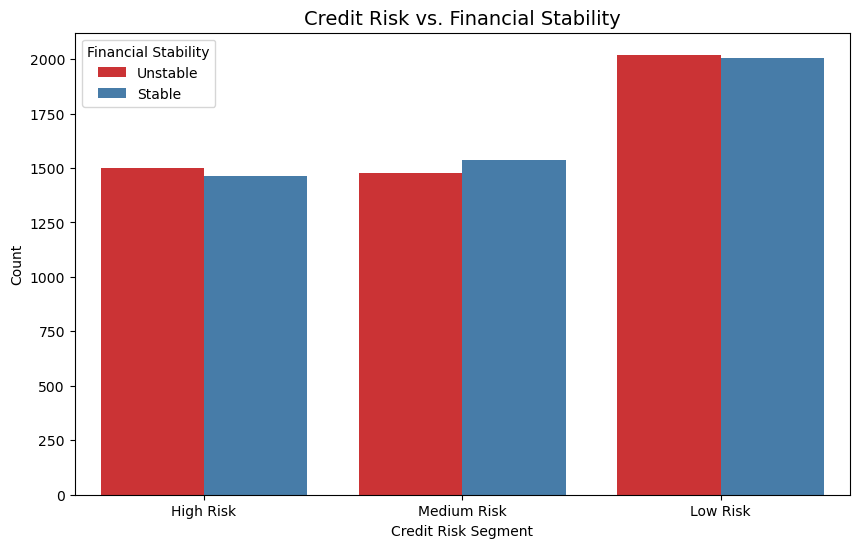

In [29]:
# Plot: Financial Stability vs. Credit Risk
plt.figure(figsize=(10, 6))
sns.countplot(x="Credit Risk Segment", hue="Financial Stability", data=sales_df, palette="Set1")
plt.title("Credit Risk vs. Financial Stability", fontsize=14)
plt.xlabel("Credit Risk Segment")
plt.ylabel("Count")
plt.legend(title="Financial Stability")
plt.show()

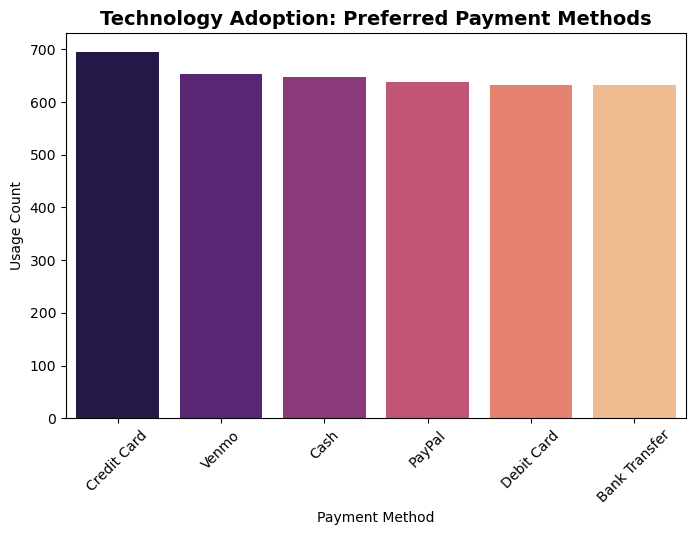

In [30]:
# Technology Adoption: Payment Methods
plt.figure(figsize=(8, 5))
sns.countplot(data=trends_df, x="Payment Method", order=trends_df["Payment Method"].value_counts().index, palette="magma")
plt.title("Technology Adoption: Preferred Payment Methods", fontsize=14, fontweight="bold")
plt.xticks(rotation=45)
plt.xlabel("Payment Method")
plt.ylabel("Usage Count")
plt.show()

# Loyalty Metrics

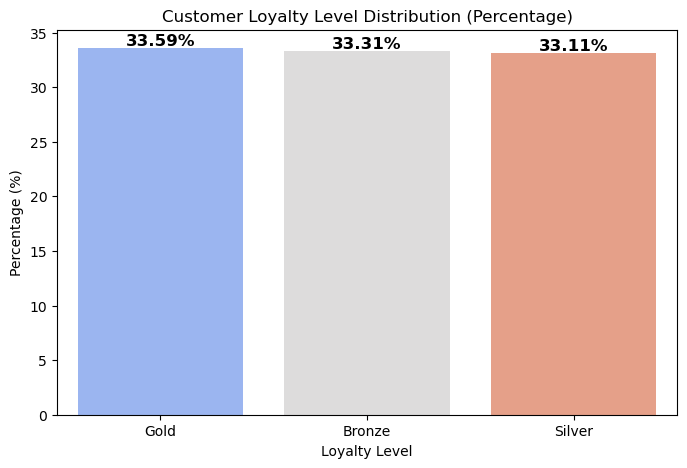

In [32]:
# Calculate loyalty level percentage
loyalty_counts = feedback_df["LoyaltyLevel"].value_counts(normalize=True) * 100

# Create a bar plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=loyalty_counts.index, y=loyalty_counts.values, palette="coolwarm")

# Annotate each bar with percentage values
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

# Set titles and labels
plt.title("Customer Loyalty Level Distribution (Percentage)")
plt.xlabel("Loyalty Level")
plt.ylabel("Percentage (%)")
plt.show()

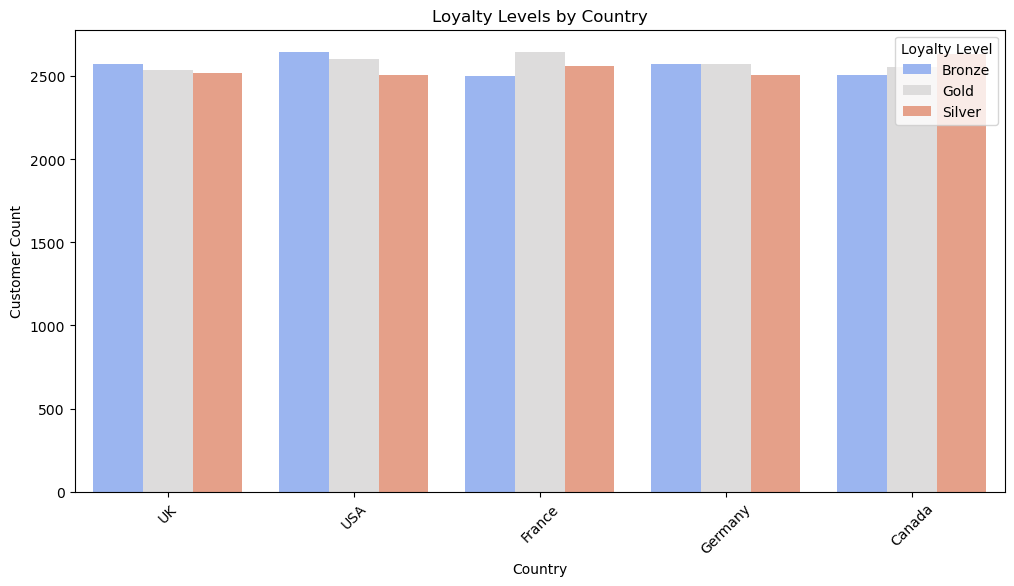

In [33]:
# Count Loyalty Levels per Country
plt.figure(figsize=(12, 6))
sns.countplot(x="Country", hue="LoyaltyLevel", data=feedback_df, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Loyalty Levels by Country")
plt.xlabel("Country")
plt.ylabel("Customer Count")
plt.legend(title="Loyalty Level")
plt.show()

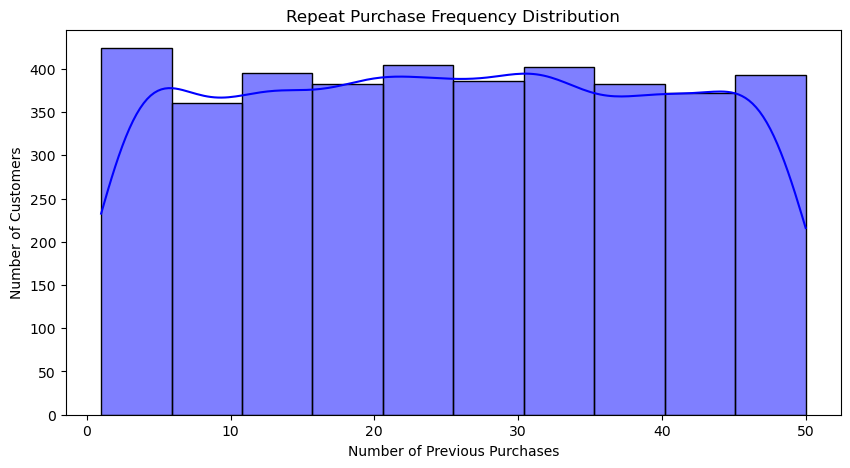

In [34]:
# Calculate repeat purchase rate
repeat_purchase_rate = trends_df["Previous Purchases"].value_counts(normalize=True) * 100

# Repeat Purchase Rate
plt.figure(figsize=(10, 5))
sns.histplot(trends_df["Previous Purchases"], bins=10, kde=True, color="blue")
plt.title("Repeat Purchase Frequency Distribution")
plt.xlabel("Number of Previous Purchases")
plt.ylabel("Number of Customers")
plt.show()

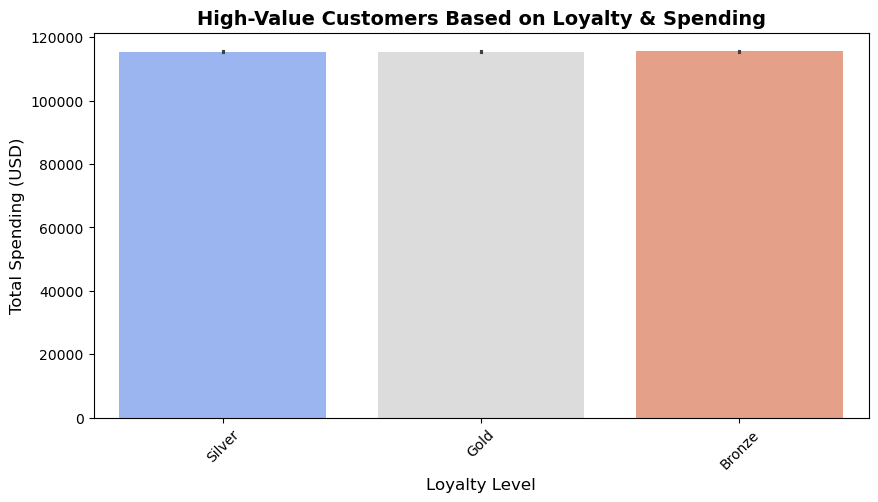

       CustomerID  Total Spending  Purchase Frequency LoyaltyLevel
18788       18789          119999                  10       Silver
36274       36275          119992                   4         Gold
5483         5484          119990                   8       Bronze
38269       38270          119990                  20       Silver
34453       34454          119988                  10       Bronze
38252       38253          119987                  10       Bronze
35297       35298          119984                  10       Silver
23702       23703          119983                  13       Silver
3750         3751          119983                  16       Silver
23520       23521          119981                  15       Silver


In [35]:
# Calculate total spending per customer
total_spending_per_customer = feedback_df.groupby("CustomerID")["Income"].sum()

# Calculate purchase frequency per customer
purchase_frequency_per_customer = feedback_df.groupby("CustomerID")["PurchaseFrequency"].sum()

# Merge with Loyalty Level
loyalty_data = feedback_df[["CustomerID", "LoyaltyLevel"]].drop_duplicates()

# Create a DataFrame
high_value_customers = pd.DataFrame({
    "Total Spending": total_spending_per_customer,
    "Purchase Frequency": purchase_frequency_per_customer
}).merge(loyalty_data, on="CustomerID")

# Define high-value customers (e.g., Top 10% spenders & loyalty)
threshold_spending = high_value_customers["Total Spending"].quantile(0.90)
high_value_customers = high_value_customers[high_value_customers["Total Spending"] >= threshold_spending]

# Visualization - High-Value Customer Distribution
plt.figure(figsize=(10, 5))
sns.barplot(x=high_value_customers["LoyaltyLevel"], y=high_value_customers["Total Spending"], palette="coolwarm")
plt.title("High-Value Customers Based on Loyalty & Spending", fontsize=14, fontweight="bold")
plt.xlabel("Loyalty Level", fontsize=12)
plt.ylabel("Total Spending (USD)", fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Display the top high-value customers
print(high_value_customers.sort_values(by="Total Spending", ascending=False).head(10))

# Market Trends

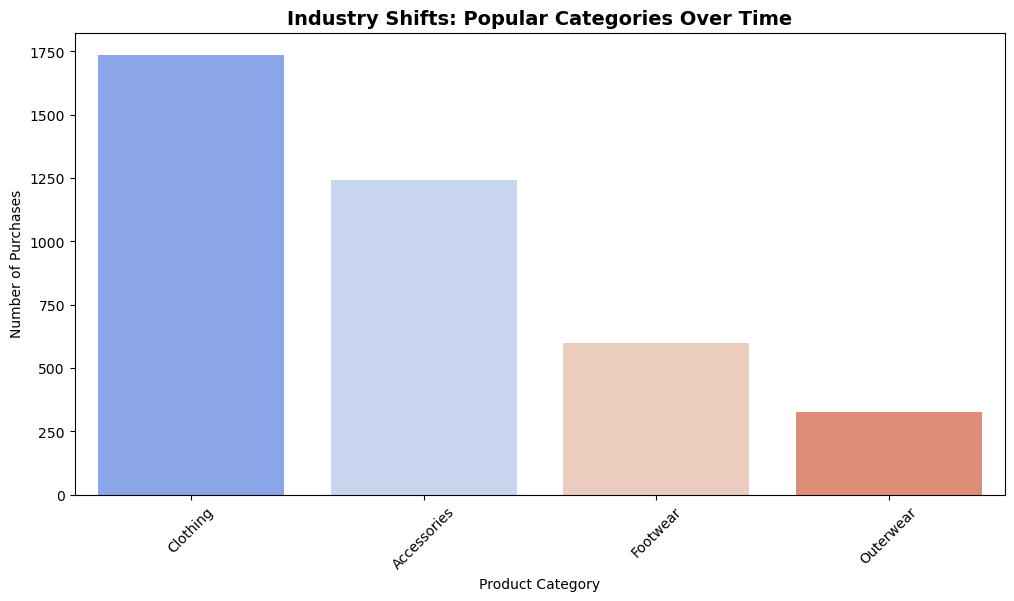

In [37]:
# Category Trends Over Time
plt.figure(figsize=(12, 6))
sns.countplot(data=trends_df, x="Category", order=trends_df["Category"].value_counts().index, palette="coolwarm")
plt.title("Industry Shifts: Popular Categories Over Time", fontsize=14, fontweight="bold")
plt.xticks(rotation=45)
plt.xlabel("Product Category")
plt.ylabel("Number of Purchases")
plt.show()

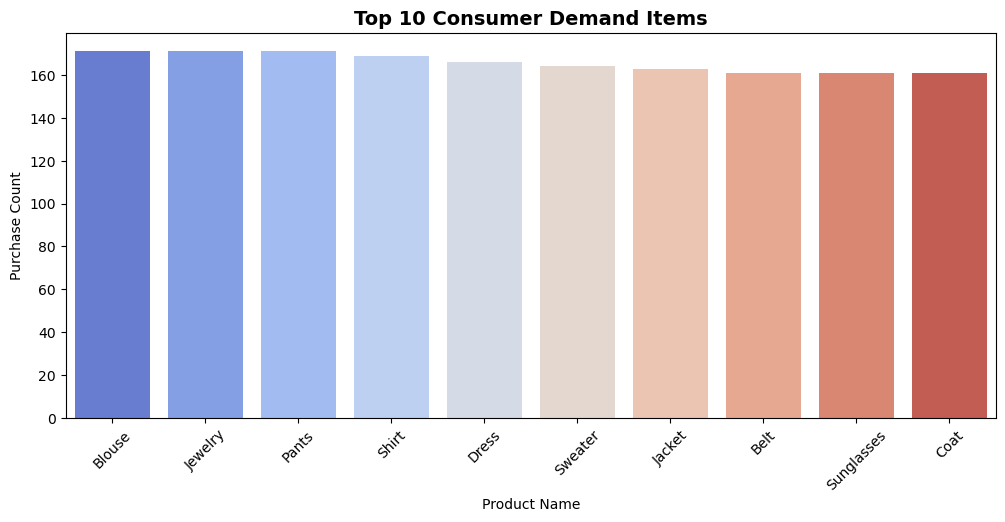

In [38]:
# Top 10 Most Purchased Products
top_products = trends_df["Item Purchased"].value_counts().head(10)
plt.figure(figsize=(12, 5))
sns.barplot(x=top_products.index, y=top_products.values, palette="coolwarm")
plt.title("Top 10 Consumer Demand Items", fontsize=14, fontweight="bold")
plt.xticks(rotation=45)
plt.xlabel("Product Name")
plt.ylabel("Purchase Count")
plt.show()

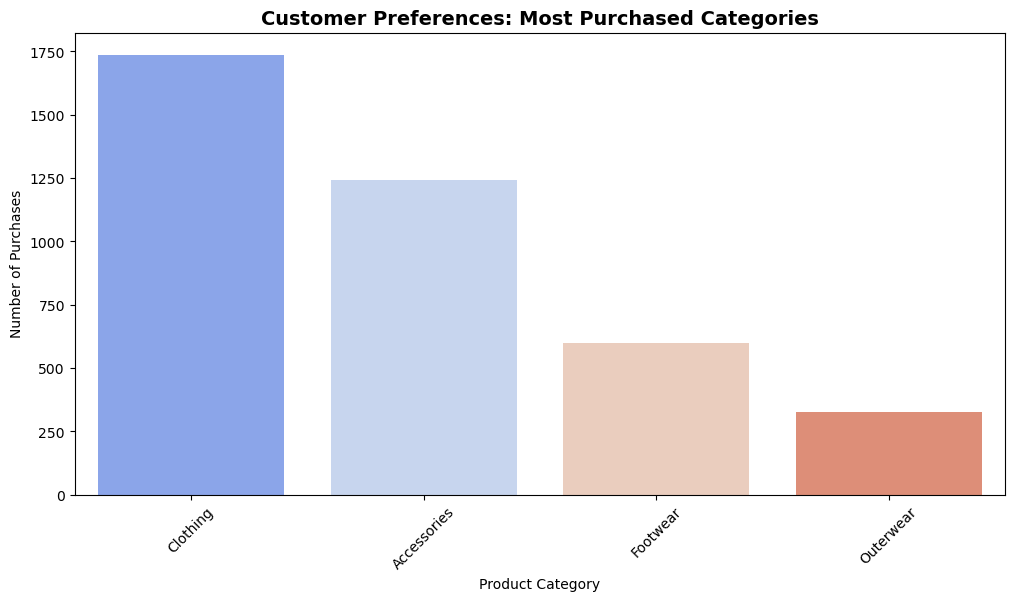

In [39]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Top Purchased Categories by Customers
plt.figure(figsize=(12, 6))
sns.countplot(data=trends_df, x="Category", order=trends_df["Category"].value_counts().index, palette="coolwarm")
plt.title("Customer Preferences: Most Purchased Categories", fontsize=14, fontweight="bold")
plt.xticks(rotation=45)
plt.xlabel("Product Category")
plt.ylabel("Number of Purchases")
plt.show()

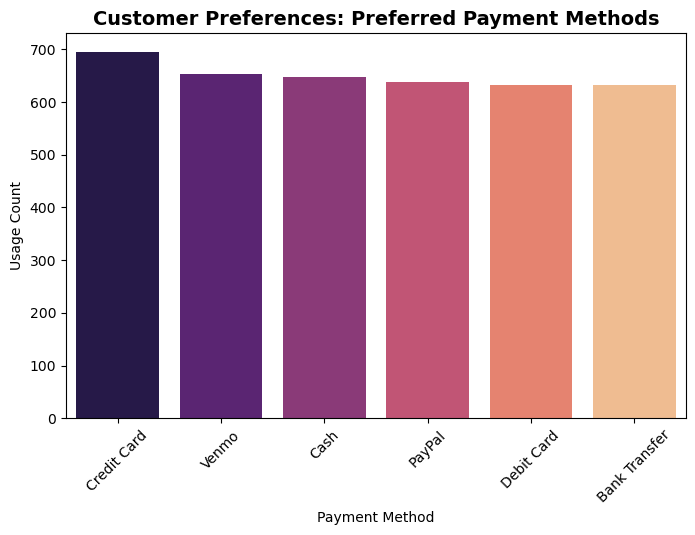

In [40]:
# Preferred Payment Methods (Customer Trends)
plt.figure(figsize=(8, 5))
sns.countplot(data=trends_df, x="Payment Method", order=trends_df["Payment Method"].value_counts().index, palette="magma")
plt.title("Customer Preferences: Preferred Payment Methods", fontsize=14, fontweight="bold")
plt.xticks(rotation=45)
plt.xlabel("Payment Method")
plt.ylabel("Usage Count")
plt.show()

C:\Users\yhuj\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\yhuj\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


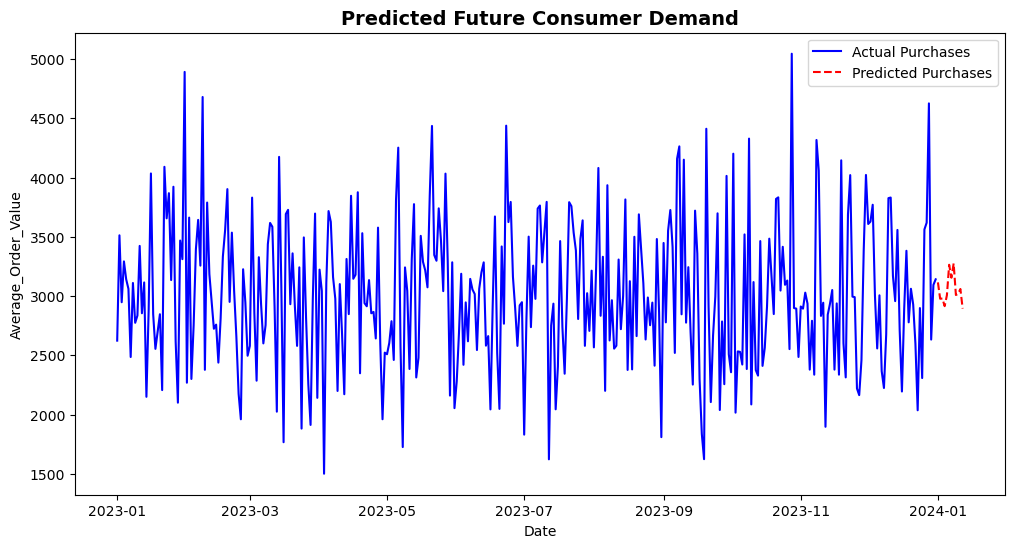

In [41]:
# Forecast Future Purchase Trends
# Assuming trends_df has a 'Date' column and 'Purchase Amount (USD)'
sales_df["Peak_Sales_Date"] = pd.to_datetime(sales_df["Peak_Sales_Date"])
purchase_trend = sales_df.groupby("Peak_Sales_Date")["Average_Order_Value"].sum()

# Apply Exponential Smoothing for Forecasting
model = ExponentialSmoothing(purchase_trend, trend="add", seasonal="add", seasonal_periods=12)
forecast = model.fit().forecast(12)  # Predict for next 12 months

# Plot the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(purchase_trend.index, purchase_trend.values, label="Actual Purchases", color="blue")
plt.plot(forecast.index, forecast.values, label="Predicted Purchases", linestyle="dashed", color="red")
plt.title("Predicted Future Consumer Demand", fontsize=14, fontweight="bold")
plt.xlabel("Date")
plt.ylabel("Average_Order_Value")
plt.legend()
plt.show()

# Feature Selection for Clustering

In [87]:
#Preprocessing for Each Dataset

In [89]:
# Select relevant columns
feedback_features = ["Age", "Income", "ProductQuality", "ServiceQuality", "PurchaseFrequency", "SatisfactionScore"]
feedback_scaled = StandardScaler().fit_transform(feedback_df[feedback_features])

# Encode categorical variables
encoder = LabelEncoder()
feedback_df["LoyaltyLevel_Encoded"] = encoder.fit_transform(feedback_df["LoyaltyLevel"])

In [91]:
# Select relevant columns
trends_features = ["Age", "Purchase Amount (USD)", "Previous Purchases"]
trends_scaled = StandardScaler().fit_transform(trends_df[trends_features])

In [93]:
# Select relevant columns 
sales_features = ["Purchase_Frequency", "Average_Order_Value", "Time_Between_Purchases", "Churn_Probability", "Lifetime_Value"]
sales_scaled = StandardScaler().fit_transform(sales_df[sales_features])


# Train K-Means Clustering for Each Dataset

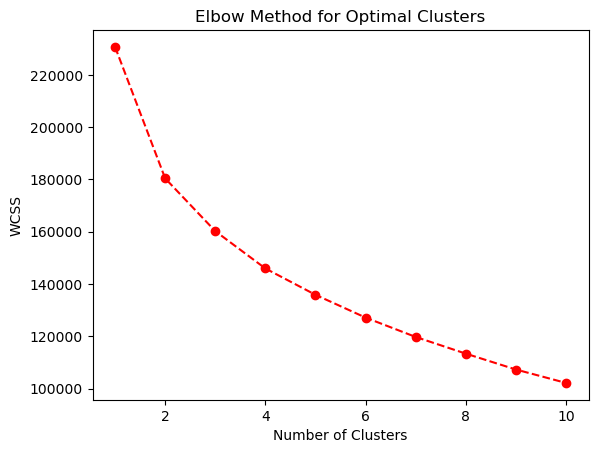

In [135]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(feedback_scaled,sales_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.plot(range(1, 11), wcss, marker='o', linestyle='dashed', color='red')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [112]:
# Function to train K-Means and assign clusters
def apply_kmeans(data_scaled, df, k=4):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    df["Cluster"] = kmeans.fit_predict(data_scaled)
    return df

# Apply K-Means
feedback_df = apply_kmeans(feedback_scaled, feedback_df)
trends_df = apply_kmeans(trends_scaled, trends_df)
sales_df = apply_kmeans(sales_scaled, sales_df)


In [113]:
from sklearn.metrics import silhouette_score

print("Feedback Data - Silhouette Score:", silhouette_score(feedback_scaled, feedback_df["Cluster"]))
print("Trends Data - Silhouette Score:", silhouette_score(trends_scaled, trends_df["Cluster"]))
print("Sales Data - Silhouette Score:", silhouette_score(sales_scaled, sales_df["Cluster"]))


Feedback Data - Silhouette Score: 0.16027852795122782
Trends Data - Silhouette Score: 0.268263620969289
Sales Data - Silhouette Score: 0.1441416437139691


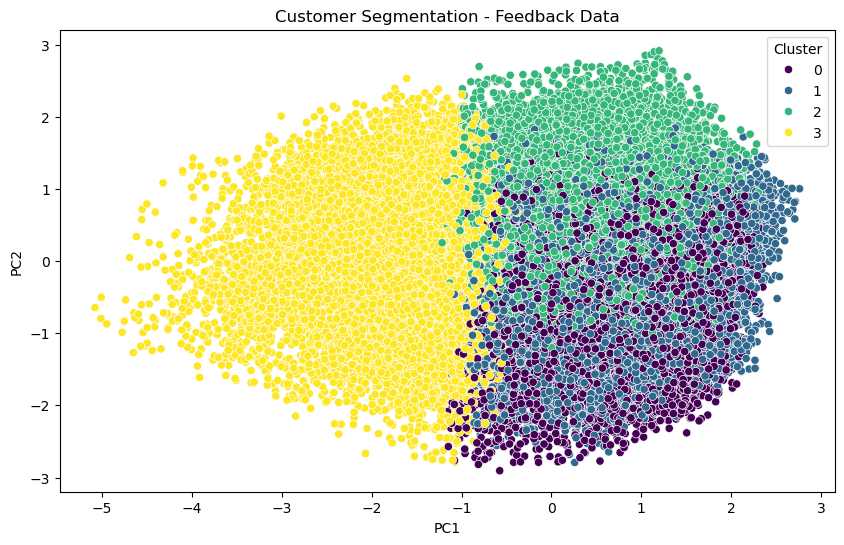

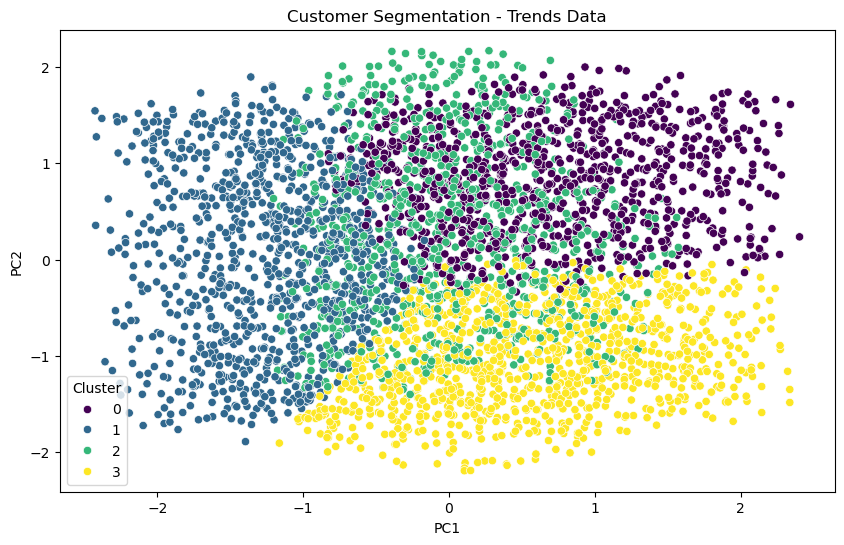

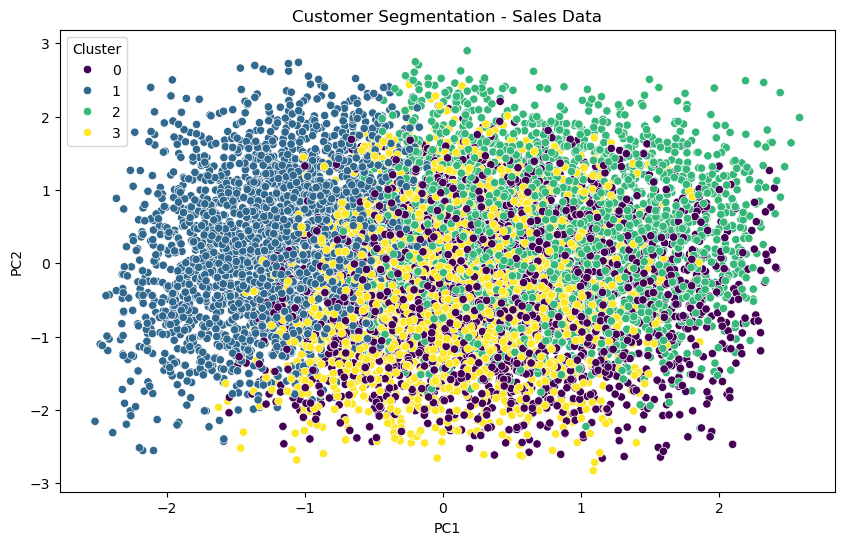

In [116]:
# Function to visualize clusters
def visualize_clusters(data_scaled, df, title):
    pca = PCA(n_components=2)
    pca_data = pca.fit_transform(data_scaled)
    
    df_pca = pd.DataFrame(pca_data, columns=["PC1", "PC2"])
    df_pca["Cluster"] = df["Cluster"]

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df_pca["PC1"], y=df_pca["PC2"], hue=df_pca["Cluster"], palette="viridis")
    plt.title(title)
    plt.show()

# Plot clusters for each dataset
visualize_clusters(feedback_scaled, feedback_df, "Customer Segmentation - Feedback Data")
visualize_clusters(trends_scaled, trends_df, "Customer Segmentation - Trends Data")
visualize_clusters(sales_scaled, sales_df, "Customer Segmentation - Sales Data")


In [137]:
pip install jupytext